In [6]:
require(RIdeogram)
library(dplyr)

Warning message:
“package ‘dplyr’ was built under R version 4.3.2”

Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [8]:
human_karyotype <- read.table("/data/kimj75/00.Files/references/chm13v2/chm13v2.human_karyotype.txt",
                             header = FALSE)
colnames(human_karyotype) <- c('Chr','Start','End','CE_start','CE_end')
human_karyotype %>% head()

,Chr,Start,End,CE_start,CE_end
,<chr>,<int>,<int>,<int>,<int>
1,chr1,1,248387328,121796048,126300487
2,chr2,1,242696752,92333543,94673023
3,chr3,1,201105948,91738002,96415026
4,chr4,1,193574945,49705154,55199795
5,chr5,1,182045439,47039134,49596625
6,chr6,1,172126628,58286706,61058390


In [12]:
met <- read.table('/vf/users/Phillippy/projects/HG002_Masseq/09.methylation/steven_count/dmr.hifi_ont.hap.all_chr.tsv',
                 header = FALSE)
met <- met[,c('V1','V2','V3','V8')]
colnames(met) <- c('Chr','Start','End','Value')
met %>% head()

,Chr,Start,End,Value
,<chr>,<int>,<int>,<dbl>
1,chr10,685484,687213,-0.2513740
2,chr10,93940147,93941627,-0.6112758
3,chr10,81404625,81405717,-0.7177300
4,chr10,134520078,134521414,0.4644842
5,chr10,87419453,87420510,-0.5565517
6,chr10,134622262,134623650,0.3519109


In [21]:
ideogram(karyotype = human_karyotype, overlaid = met)
convertSVG("chromosome.svg", device = "png", dpi = 600)

In [58]:
met <- read.table('/vf/users/Phillippy/projects/HG002_Masseq/09.methylation/steven_count/dmr.hifi_ont.hap.all_chr.tsv',
                 header = FALSE)
met$Max_V6_V7 <- pmax(met$V6, met$V7)
met %>% head()


,V1,V2,V3,V4,V5,V6,V7,V8,V9,Max_V6_V7
,<chr>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,chr10,685484,687213,1730,229,0.08813748,0.3395115,-0.2513740,-2058.051,0.3395115
2,chr10,93940147,93941627,1481,106,0.26367364,0.8749494,-0.6112758,-2031.281,0.8749494
3,chr10,81404625,81405717,1093,69,0.15733839,0.8750684,-0.7177300,-1941.717,0.8750684
4,chr10,134520078,134521414,1337,127,0.70784840,0.2433642,0.4644842,1683.815,0.7078484
5,chr10,87419453,87420510,1058,73,0.12803024,0.6845819,-0.5565517,-1406.100,0.6845819
6,chr10,134622262,134623650,1389,143,0.73099079,0.3790799,0.3519109,1207.859,0.7309908


In [57]:
met[,c(met$V6,met$V7)]

Warning message in rbind(parts$upper, chars$ellip_v, parts$lower, deparse.level = 0L):
“number of columns of result is not a multiple of vector length (arg 2)”


1    
2    
3    
4    
5    
6    
7    
8    
9    
10   
11   
12   
13   
14   
15   
16   
17   
18   
19   
20   
21   
22   
23   
24   
25   
26   
27   
28   
29   
30   
⋮    
38554
38555
38556
38557
38558
38559
38560
38561
38562
38563
38564
38565
38566
38567
38568
38569
38570
38571
38572
38573
38574
38575
38576
38577
38578
38579
38580
38581
38582
38583

Warning message in xy.coords(x, y, xlabel, ylabel, log):
“200 y values <= 0 omitted from logarithmic plot”


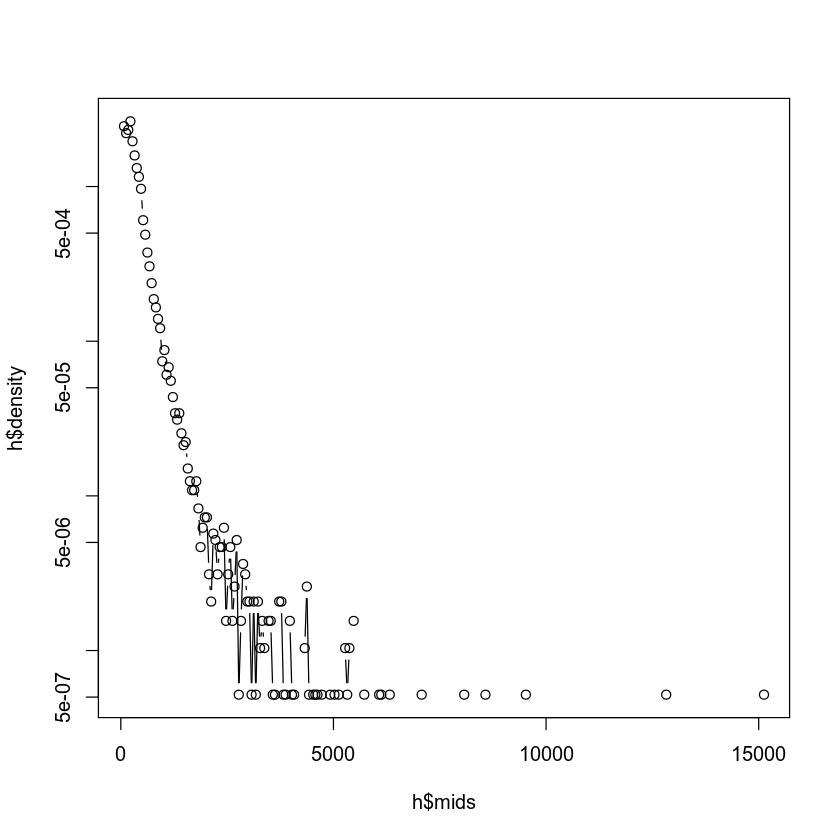

In [30]:
h <- hist(met$V4, breaks="Scott", plot=FALSE)
plot(h$mids, h$density, log="y", type='b')

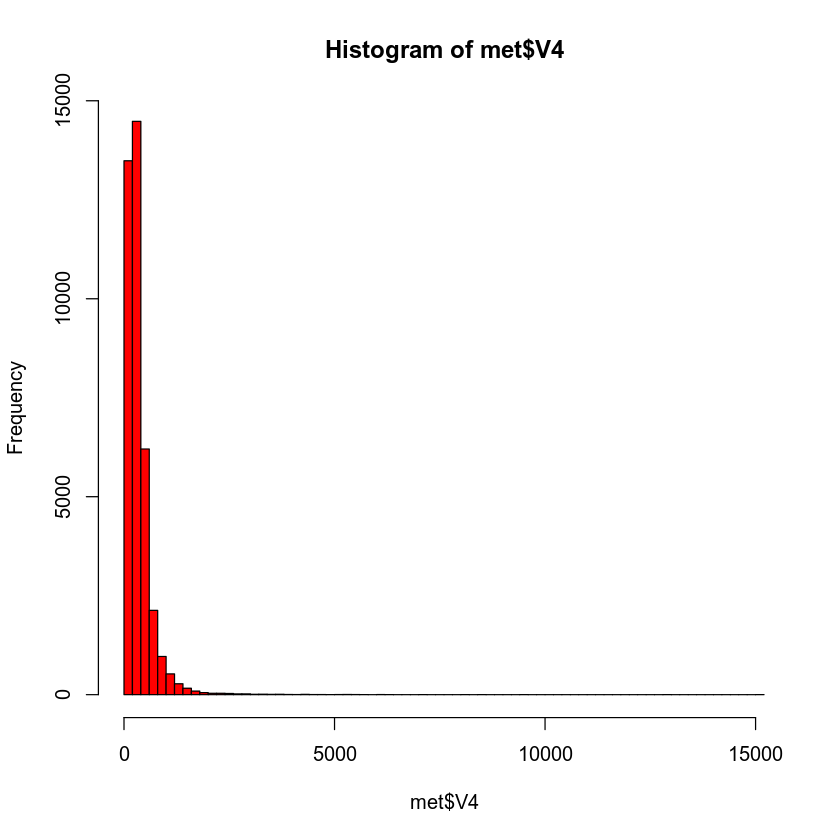

In [29]:
hist(met$V4, breaks=100, col="red")

Warning message in xy.coords(x, y, xlabel, ylabel, log):
“12 y values <= 0 omitted from logarithmic plot”


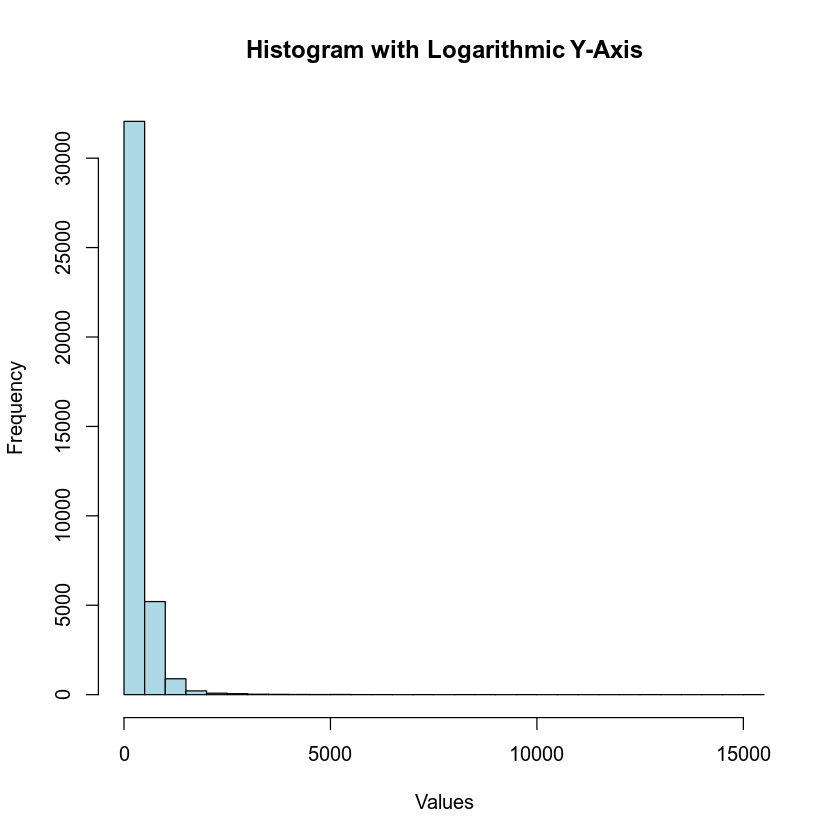

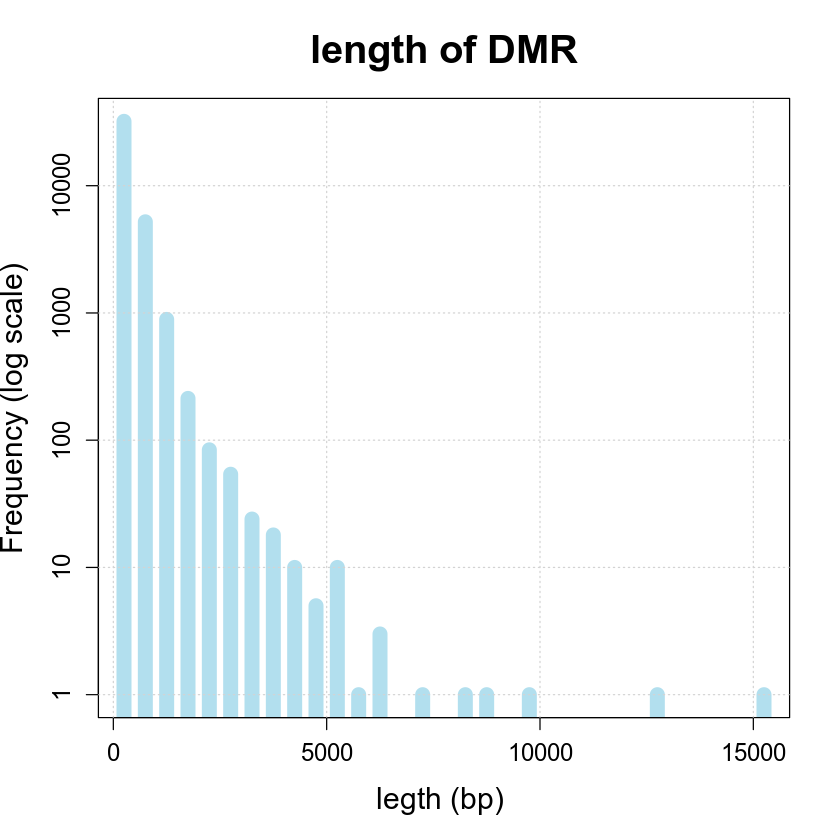

In [49]:
# Sample data
data <- met$V4  # Generate random data for illustration

# Create the histogram
hist(data, breaks=30, main="Histogram with Logarithmic Y-Axis", xlab="Values", ylab="Frequency", col="lightblue")

# Get histogram data
hist_data <- hist(data, breaks=30, plot=FALSE)

# Adjust the plot with a logarithmic y-axis
plot(hist_data$mids, hist_data$counts,type="h", 
     lwd=12, col="lightblue2", 
     log="y", xlab="legth (bp) ", ylab="Frequency (log scale)",
     main="length of DMR",
         cex.lab=1.5,     # Font size for axis labels
     cex.axis=1.2,    # Font size for axis tick labels
     cex.main=2       # Font size for the main title
     )

# Add a grid for better visibility
grid()


Warning message in xy.coords(x, y, xlabel, ylabel, log):
“1 y value <= 0 omitted from logarithmic plot”


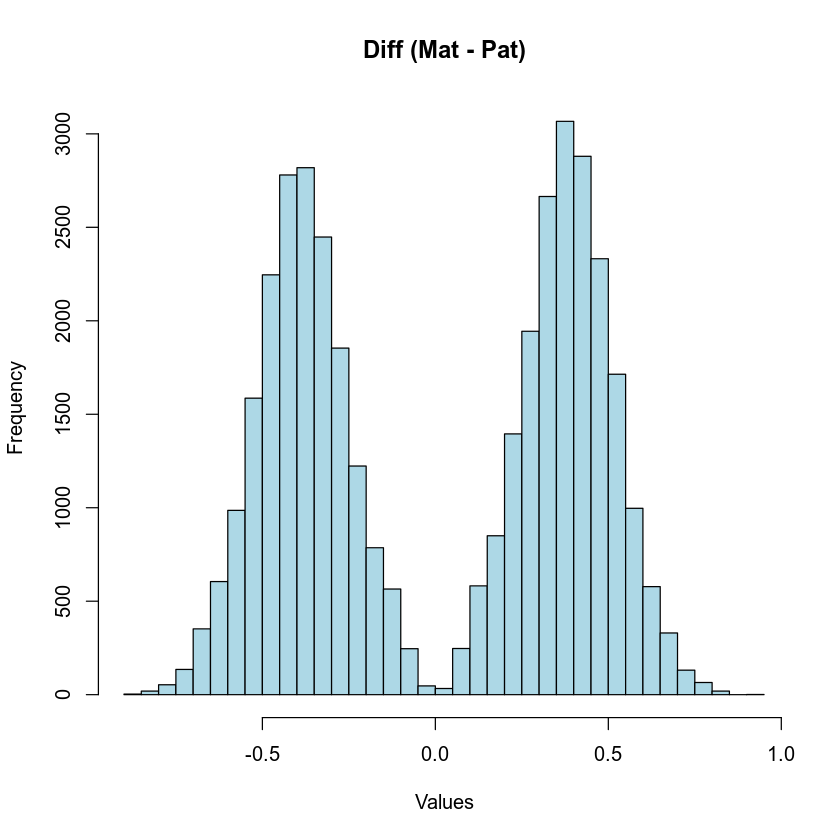

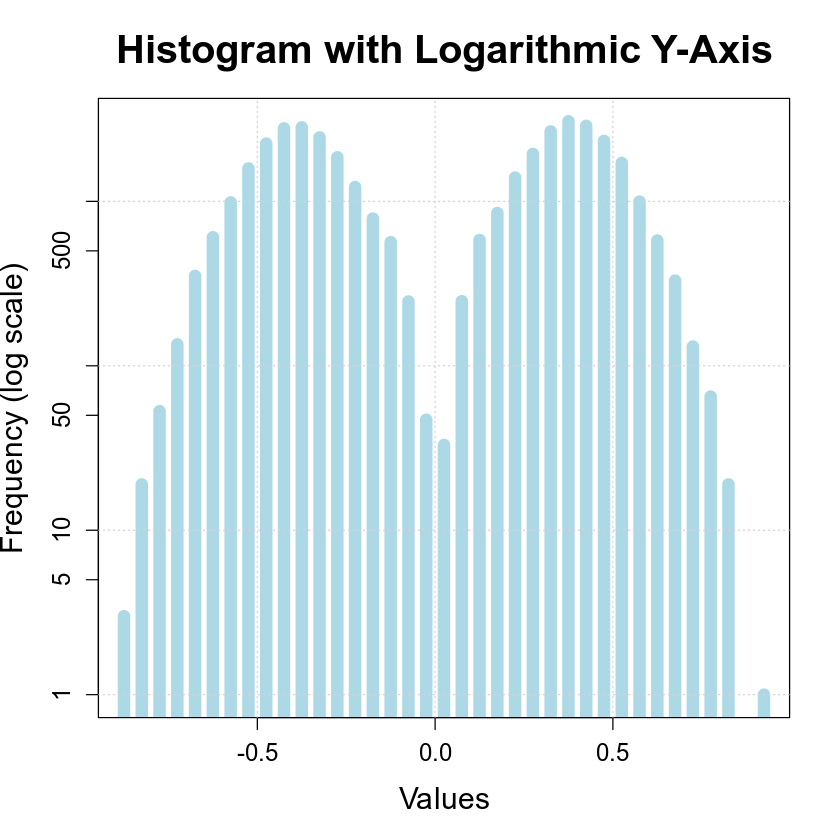

In [50]:
# Sample data
data <- met$V8  # Generate random data for illustration

# Create the histogram
hist(data, breaks=30, main="Diff (Mat - Pat)", xlab="Values", ylab="Frequency", col="lightblue")

# Get histogram data
hist_data <- hist(data, breaks=30, plot=FALSE)

# Adjust the plot with a logarithmic y-axis
plot(hist_data$mids, hist_data$counts, type="h", lwd=10, col="lightblue", 
     log="y", xlab="Values", ylab="Frequency (log scale)",
     main="Histogram with Logarithmic Y-Axis",
          cex.lab=1.5,     # Font size for axis labels
     cex.axis=1.2,    # Font size for axis tick labels
     cex.main=2       # Font size for the main title
     )
     

# Add a grid for better visibility
grid()


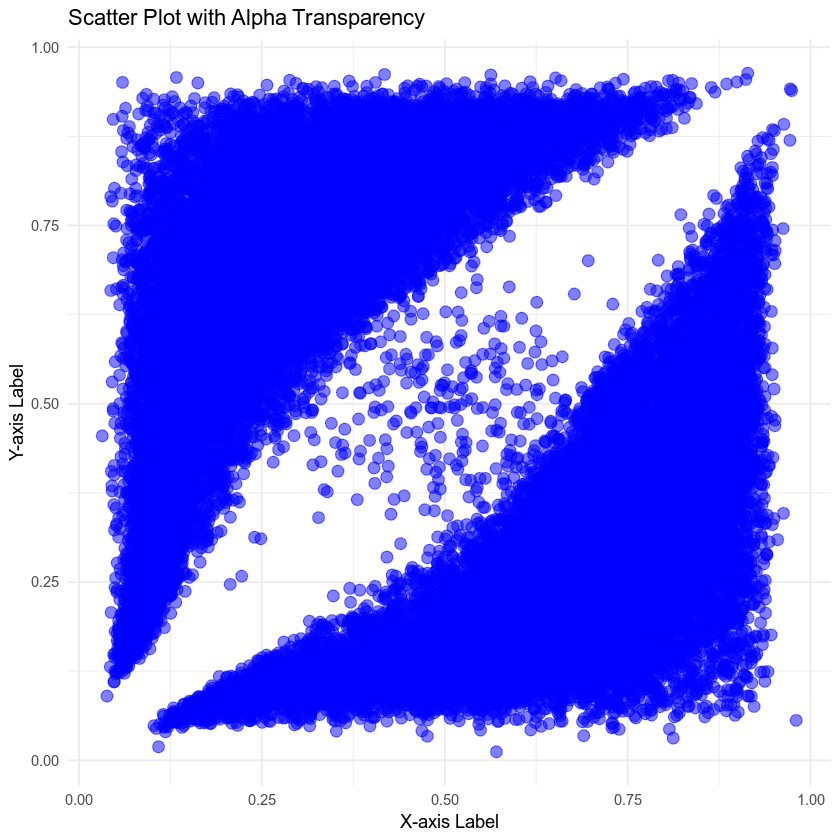

In [54]:

library(ggplot2)

# Sample data
df <- data.frame(x = rnorm(100), y = rnorm(100))

# Create scatter plot with transparency
ggplot(met, aes(x=V6, y=V7)) +
  geom_point(color="blue", size=3, alpha=0.5) +  # 50% transparency
  ggtitle("Scatter Plot with Alpha Transparency") +
  xlab("X-axis Label") +
  ylab("Y-axis Label") +
  theme_minimal()


In [59]:
met %>% head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,Max_V6_V7
,<chr>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,chr10,685484,687213,1730,229,0.08813748,0.3395115,-0.2513740,-2058.051,0.3395115
2,chr10,93940147,93941627,1481,106,0.26367364,0.8749494,-0.6112758,-2031.281,0.8749494
3,chr10,81404625,81405717,1093,69,0.15733839,0.8750684,-0.7177300,-1941.717,0.8750684
4,chr10,134520078,134521414,1337,127,0.70784840,0.2433642,0.4644842,1683.815,0.7078484
5,chr10,87419453,87420510,1058,73,0.12803024,0.6845819,-0.5565517,-1406.100,0.6845819
6,chr10,134622262,134623650,1389,143,0.73099079,0.3790799,0.3519109,1207.859,0.7309908


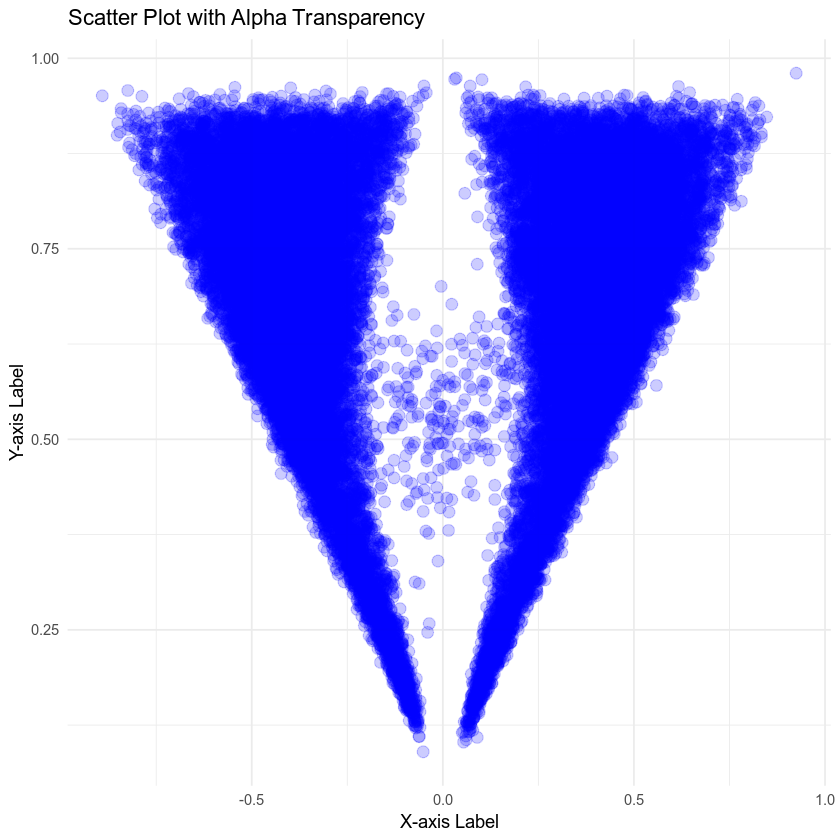

In [62]:

library(ggplot2)

# Sample data

# Create scatter plot with transparency
ggplot(met, aes(x=V8, y=Max_V6_V7, size = V4)) +
  geom_point(color="blue", size=3, alpha=0.2) +  # 50% transparency
  ggtitle("Scatter Plot with Alpha Transparency") +
  xlab("X-axis Label") +
  ylab("Y-axis Label") +
  theme_minimal()


In [65]:
max(met$V4)

[1] 15112

In [66]:
result <- met %>%
  group_by(V1) %>%
  summarise(Sum_V4 = sum(V4))

In [69]:
result

V1,Sum_V4
<chr>,<int>
chr1,1089388
chr10,658201
chr11,594562
chr12,595296
chr13,341610
chr14,398359
chr15,649730
chr16,587606
chr17,647023


Warning message:
“Unknown or uninitialised column: `chr`.”


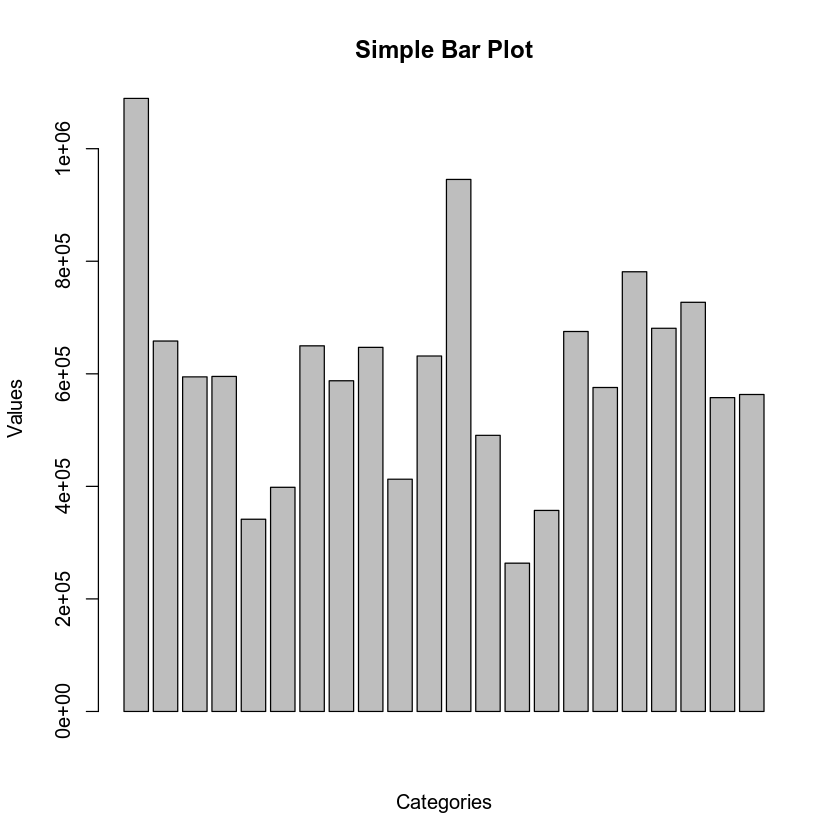

In [73]:
barplot(result$Sum_V4,
        names.arg = result$chr,
        main = "Simple Bar Plot",
        xlab = "Categories",
        ylab = "Values",
        # col = "lightblue",
        # border = "blue",
       )